In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\pearl\\OneDrive\\Documents\\worker_0.multi_agent_graph.main_level.main_level.agent_0 (1).csv")

In [4]:
df.info

<bound method DataFrame.info of      Episode #  Training Iter  Epoch  In Heatup  ER #Transitions  \
0            1              0      0          0               91   
1            2              0      0          0              120   
2            3              0      0          0              153   
3            4              0      0          0              193   
4            5              0      0          0              267   
..         ...            ...    ...        ...              ...   
180        181              9      0          0              363   
181        182              9      0          0              980   
182        183              9      0          0             1155   
183        184              9      0          0             1824   
184        185              9      0          0             2800   

     ER #Episodes  Episode Length  Total steps  Epsilon  \
0               1              91           91      0.1   
1               2              29

In [5]:
# Display the first few rows of the dataframe
print(df.head())

# Display a concise summary of the dataframe
print(df.info())

   Episode #  Training Iter  Epoch  In Heatup  ER #Transitions  ER #Episodes  \
0          1              0      0          0               91             1   
1          2              0      0          0              120             2   
2          3              0      0          0              153             3   
3          4              0      0          0              193             4   
4          5              0      0          0              267             5   

   Episode Length  Total steps  Epsilon  Shaped Training Reward  ...  \
0              91           91      0.1               11.011223  ...   
1              29          120      0.1                6.054585  ...   
2              33          153      0.1                3.901252  ...   
3              40          193      0.1                6.494331  ...   
4              74          267      0.1               16.102381  ...   

   KL Divergence/Max  KL Divergence/Min  Likelihood Ratio/Mean  \
0                NaN

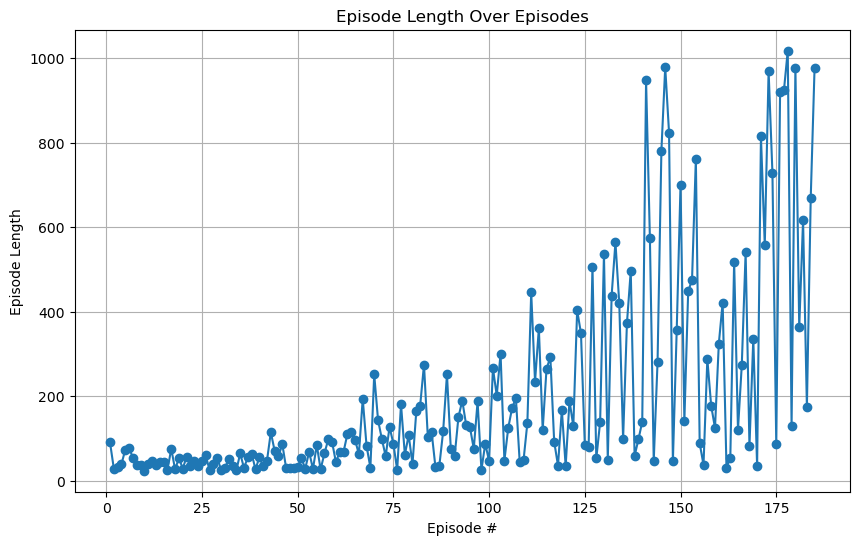

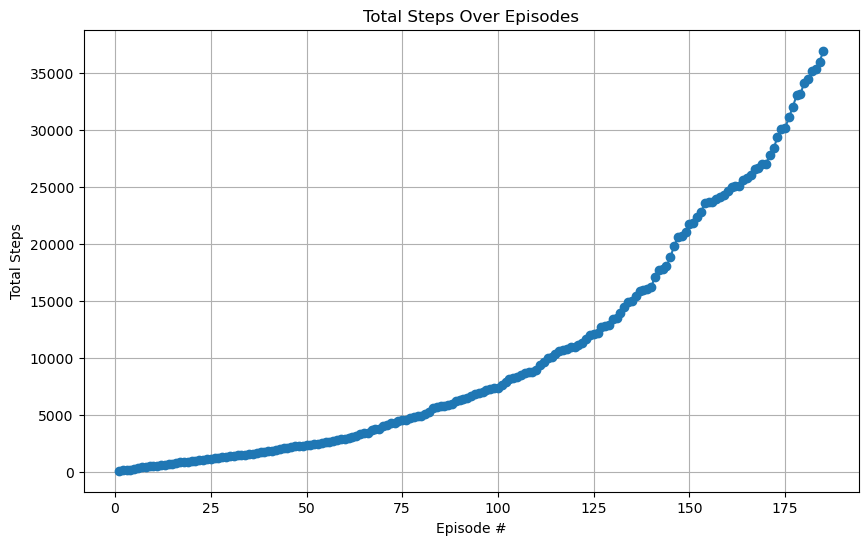

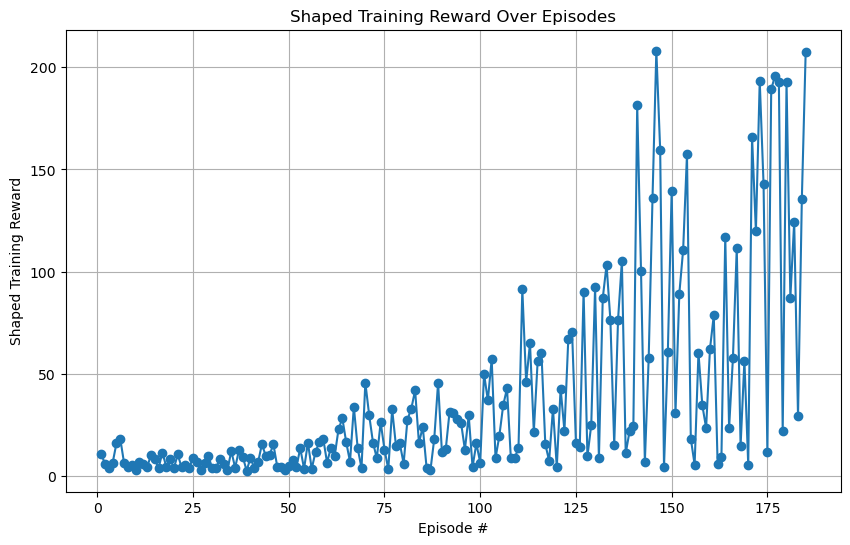

In [6]:
# Plotting Episode Length over Episodes
plt.figure(figsize=(10, 6))
plt.plot(df['Episode #'], df['Episode Length'], marker='o', linestyle='-')
plt.title('Episode Length Over Episodes')
plt.xlabel('Episode #')
plt.ylabel('Episode Length')
plt.grid(True)
plt.show()

# Plotting Total Steps over Episodes
plt.figure(figsize=(10, 6))
plt.plot(df['Episode #'], df['Total steps'], marker='o', linestyle='-')
plt.title('Total Steps Over Episodes')
plt.xlabel('Episode #')
plt.ylabel('Total Steps')
plt.grid(True)
plt.show()

# Plotting Shaped Training Reward over Episodes
plt.figure(figsize=(10, 6))
plt.plot(df['Episode #'], df['Shaped Training Reward'], marker='o', linestyle='-')
plt.title('Shaped Training Reward Over Episodes')
plt.xlabel('Episode #')
plt.ylabel('Shaped Training Reward')
plt.grid(True)
plt.show()


In [7]:
# Analyze low reward episodes
low_rewards = df[df['Shaped Training Reward'] < 10]  # Threshold can be adjusted
print("Low Reward Episodes:")
print(low_rewards[['Episode #', 'Shaped Training Reward', 'Episode Length', 'Total steps']])


Low Reward Episodes:
     Episode #  Shaped Training Reward  Episode Length  Total steps
1            2                6.054585              29          120
2            3                3.901252              33          153
3            4                6.494331              40          193
6            7                6.357302              54          399
7            8                4.703710              37          436
..         ...                     ...             ...          ...
147        148                4.465628              46        20655
155        156                5.651615              38        23667
161        162                6.173760              31        25036
162        163                9.621178              55        25091
169        170                5.480418              35        27000

[66 rows x 4 columns]


In [8]:
# Check correlation between important features
important_features = df[['Shaped Training Reward', 'Episode Length', 'Total steps', 'Epsilon']]
correlation_matrix = important_features.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        Shaped Training Reward  Episode Length  Total steps  \
Shaped Training Reward                1.000000        0.995415     0.686777   
Episode Length                        0.995415        1.000000     0.677631   
Total steps                           0.686777        0.677631     1.000000   
Epsilon                                    NaN             NaN          NaN   

                        Epsilon  
Shaped Training Reward      NaN  
Episode Length              NaN  
Total steps                 NaN  
Epsilon                     NaN  


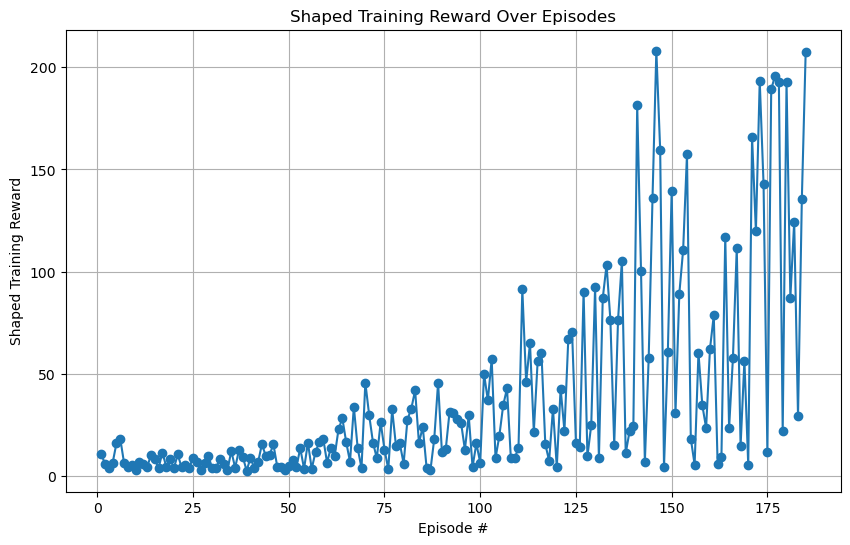

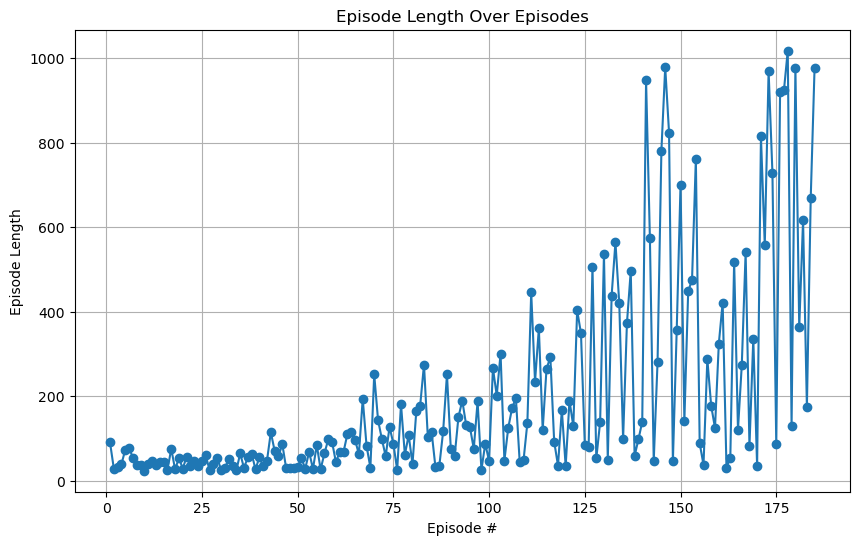

Low Reward Episodes:
     Episode #  Shaped Training Reward  Episode Length  Total steps
2            3                3.901252              33          153
7            8                4.703710              37          436
9           10                2.962221              24          497
12          13                4.392475              38          622
15          16                4.029204              26          738
17          18                4.738562              27          841
19          20                3.824084              29          924
21          22                4.460230              34         1015
23          24                4.142758              34         1095
26          27                2.969465              25         1227
29          30                3.984052              26         1348
30          31                4.091167              31         1379
33          34                3.240425              25         1490
35          36             

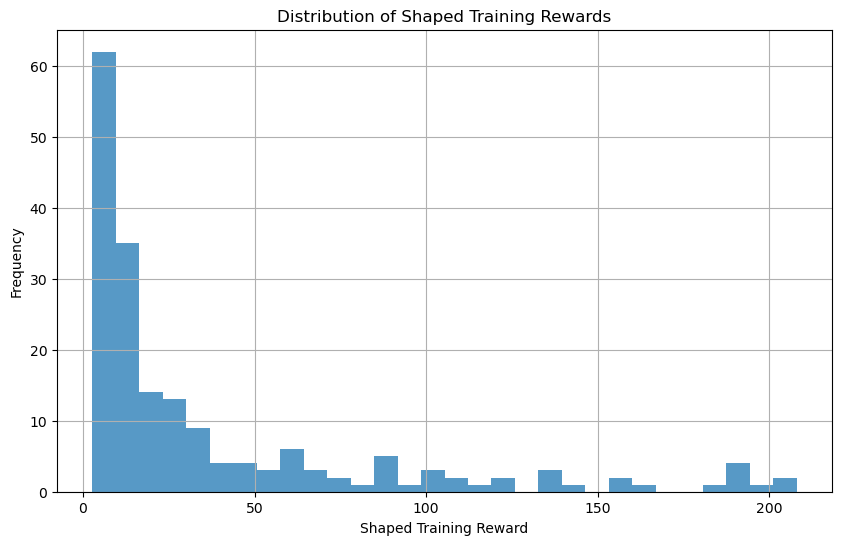

In [9]:
# Function to plot data
def plot_data(x, y, title, xlabel, ylabel, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Plot Shaped Training Reward over Episodes
plot_data(df['Episode #'], df['Shaped Training Reward'], 'Shaped Training Reward Over Episodes', 'Episode #', 'Shaped Training Reward')

# Plot Episode Length over Episodes
plot_data(df['Episode #'], df['Episode Length'], 'Episode Length Over Episodes', 'Episode #', 'Episode Length')

# Analyze episodes with particularly low rewards
low_rewards_threshold = 5  # Define what you consider low
low_rewards_df = df[df['Shaped Training Reward'] < low_rewards_threshold]
print("Low Reward Episodes:")
print(low_rewards_df[['Episode #', 'Shaped Training Reward', 'Episode Length', 'Total steps']])

# Correlation matrix
correlation_matrix = df[['Shaped Training Reward', 'Episode Length', 'Total steps']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Histogram of Shaped Training Rewards to see distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Shaped Training Reward'], bins=30, alpha=0.75)
plt.title('Distribution of Shaped Training Rewards')
plt.xlabel('Shaped Training Reward')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()